In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Non-negative matrix factorization(NMF)

### Non-negative matrix factorization
- NMF = 'non-negative matrix factorization
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!
- However, all samples features amust be non-negative (>=0)

### Interpretable parts
- NMF expresses documents as combinations of topics (or 'themes')
- NMF expresses images as combinations of patterns

### Using scikit-learn NMF
- Follows fit() / transform() pattern
- Must specify number of components e.g. NMF(n_components=2)
- Works with NumPy arrays and with csr_matrix

### Example word-frequency array
- Word frequency array, 4 words, many documents
- Measure presence of words in each document using 'tf-idf'
 - 'tf' = frequency of word in document
 - 'idf' reduces influence of frequent words

### Example usage of NMF
 - samples is the word-frequency array

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)

In [ ]:
nmf_features = model.transform(samples)

### NMF components
- NMF has components
- ... just like PCA has principal components
- Dimension of components = dimension of samples
- Entries are non-negative

In [ ]:
print(model.components_)

### NMF features
- NMF feature values are non-negative
- Can be used to reconstruct the samples
- ... combine feature values with components

In [ ]:
print(nmf_features)

### Reconstruction of a sample

In [ ]:
print(samples[i, :])

In [ ]:
print(nmf_features[i, :])

### Sample reconstruction
- Multiply components by feature values, and add up
- Can also be expressed as a product of matrices
- This is the 'Matrix Factorization" in 'NMF'

### NMF fits to non-negative data only
- Word frequencies in each document
- Images encoded as arrays
- Audio spectograms
- Purchase histories on e-commerce sites
- ... many many more!

### NMF applied to Wikipedia articles
- In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [18]:
titles = pd.read_csv('wikipedia-vectors.csv', index_col=0).columns
articles = pd.read_csv('wikipedia-vectors.csv', index_col=0).values.T
from scipy.sparse import csr_matrix
articles = csr_matrix(articles)
articles.shape

(60, 13125)

In [19]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

Fantastic - let's explore the meaning of these features in the next exercise!

### NMF features of the Wikipedia articles
- Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

- When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [20]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575612
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422308
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


Great work! Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

### NMF reconstructs samples
- In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are [2, 1], then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample [0.1203 0.1764 0.3195 0.141].

In [15]:
# the components of an NMF model
[[1.0, 0.5, 0.0], 
 [0.2, 0.1, 2.1]]

# the NMF feature values 
[2, 1]

# the answer
[2.2, 1.1, 2.1]

#   2 * [1.0, 0.5, 0.0]
# + 1 * [0.2, 0.1, 2.1]
#   =   [2.2, 1.1, 2.1]

[2.2, 1.1, 2.1]

## NMF learns interpretable parts

## Example: NMF learns interpretable parts
- Word-frequency array articles(tf-idf)
- 20,000 scientific articles (rows)
- 800 words (columns)

### Applying NMF to the articles

In [ ]:
print(articles.shape)  # (20000, 800)

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)
nmf.fit(articles)

In [ ]:
print(nmf.components_.shape)  # (10, 800)

### NMF components
- For documents:
 - NMF components represent topics
 - NMF features combine topics into documents
- For images, NMF compoents are parts of images

### Grayscale images
- 'Grayscale' image = no colors, only shades of gray
- Measure pixel brightness
- Represent with value between 0 and 1 (0 is black)
- Convert to 2D array

### Grayscale images as flat arrays
- Enumerate the entries
- Row-by-row
- From left to right top to bottom

### Encoding a collection of images
- collection of images of the same size
- Encode as 2D array
- Each row corresponds to an image
- Each column corresponds to a pixel
- ... can apply NMF!

### Visualizing samples

In [ ]:
print(sample)  # [0, 1, 0.5, 1, 0, 1]

In [ ]:
bitmap = sample.reshape((2, 3))
print(bitmap)  # [[0, 1, 0.5]
               #  [1, 0, 1]]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

### NMF learns topics of documents
- In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

- The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

- After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.loc[3]

# Print result of nlargest
print(component.nlargest())

Great work! Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

### Explore the LED digits dataset
- In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [27]:
samples = pd.read_csv('lcd-digits.csv', header=None).values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


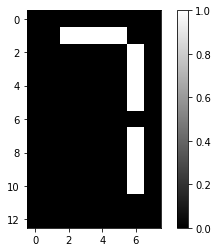

In [28]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0, :]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images
- Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:
- After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

In [29]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

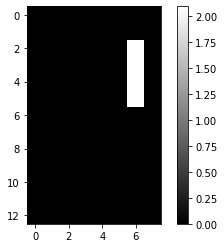

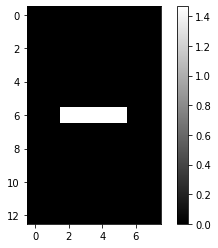

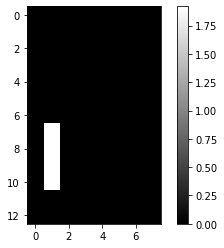

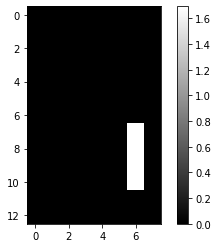

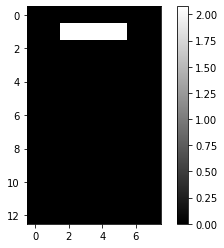

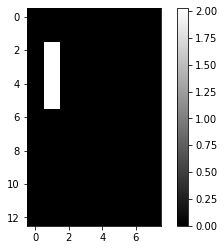

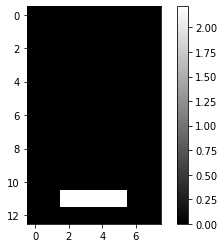

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37562716e-16]


In [30]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0, :]

# Print digit_features
print(digit_features)

Great work! Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### PCA doesn't learn parts
- Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

- After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

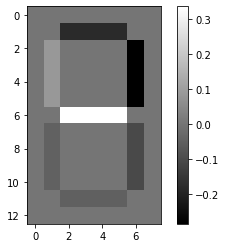

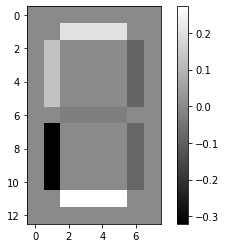

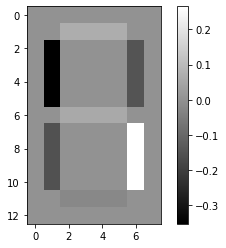

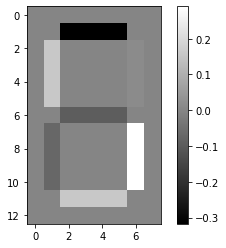

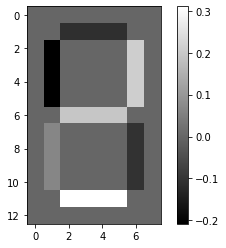

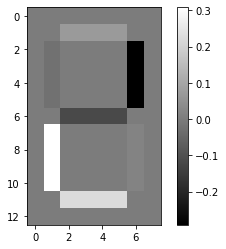

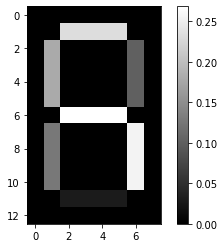

In [33]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Great work! Notice that the components of PCA do not represent meaningful parts of images of LED digits!

## Building recommender systems using NMF

### Finding similar articles
- Engineer at a large online newspaper
- Task: recommend articles similar to article being read by customer
- Similar articles should hae similar topics

### Strategy
- Apply NMF to the word-frequency array
- NMF feature values describe the topics
- ... so similar documents have similar NMF feature values
- Compare NMF feature values?

### Apply NMF to the word-frequency array
- artiles is a word frequency array

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

### Versions of articles
- Differnt versions of the same document have same topic proportions
- ... exact feature values may be different!
- E.g. because one version uses many meaningless words (strong version vs. weak version)
- But all versions lie on the same line through the origin

### Cosine similarity
- Uses the angle between the lines
- Higher value means more similar
- Maximum value is 1, when angle is 0 degrees

### Calculating the cosine similarities

In [ ]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
# if has index 23
current_article = norm_features[23, :]
similarities = norm_features.dot(current_article)
print(similarities)

### DataFrames and labels
- Label similarities with the article titles, using a DataFrame
- Titles given as a list: titles

In [ ]:
import pandas as pd
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Dog bites man']
similarities = df.dot(current_article)
print(similarities.nlargest())

### Which articles are similar to 'Cristiano Ronaldo'?
- In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [35]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


Great work - although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!

### Recommend musical artists part I
- In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

- In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [63]:
artist_names = pd.read_csv('artists.csv', header=None)[0].values
raw_ = pd.read_csv('scrobbler-small-sample.csv')
artists = pd.crosstab(raw_['artist_offset'], raw_['user_offset']).values
artists.shape

(111, 500)

In [64]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

Excellent work - now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical artists!

### Recommend musical artists part II
- Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

In [65]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.993596
Bob Dylan            0.989190
Van Morrison         0.978322
Simon & Garfunkel    0.954246
dtype: float64


Well done, and congratulations on reaching the end of the course!